<b>Target :</b> To improve the overall perfromance of the model by increasing number of weights, adding image augmentation and using a step LR to try to hit the target accuracy faster<br>
<b>Results :</b> The train and test accuracies are fluctuating about 98.8%<br>
<b>Analysis :</b> Increasing the weights(by +300) and image augmentation(random rotation and random affine) has not helped improve the train accuracy for some reason. Therefore step LR doesnt seem to help much either. YTD : I would still try to change the model architecture to add more weight(by adding kernels), probably not have a sencond transition block and instead have only 2 convolutions after the first transition block.

# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations


In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# View sample images

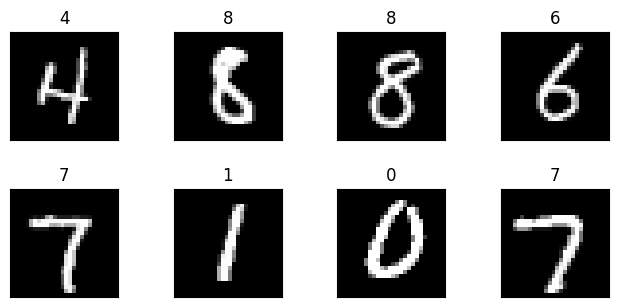

In [5]:
from utils import return_dataset_images

return_dataset_images(train_loader, 8)

# Model Params

In [6]:
from model_3 import Net, model_summary, model_train, model_test

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
model_summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           2,304
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

# Training and Testing

In [7]:
from torch.optim.lr_scheduler import StepLR

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    model_train(model, device, train_loader, optimizer, criterion)
    scheduler.step()
    model_test(model, device, test_loader, criterion)

Epoch 1


Train: Loss=0.1091 Batch_id=468 Accuracy=84.50: 100%|██████████| 469/469 [00:23<00:00, 19.92it/s]


Test set: Average loss: 0.1739, Accuracy: 9521/10000 (95.21%)

Epoch 2


Train: Loss=0.0363 Batch_id=468 Accuracy=96.88: 100%|██████████| 469/469 [00:21<00:00, 22.27it/s]


Test set: Average loss: 0.0869, Accuracy: 9759/10000 (97.59%)

Epoch 3


Train: Loss=0.0545 Batch_id=468 Accuracy=97.61: 100%|██████████| 469/469 [00:21<00:00, 21.65it/s]


Test set: Average loss: 0.0558, Accuracy: 9845/10000 (98.45%)

Epoch 4


Train: Loss=0.0682 Batch_id=468 Accuracy=97.93: 100%|██████████| 469/469 [00:22<00:00, 20.59it/s]


Test set: Average loss: 0.0528, Accuracy: 9848/10000 (98.48%)

Epoch 5


Train: Loss=0.0192 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:22<00:00, 20.81it/s]


Test set: Average loss: 0.0499, Accuracy: 9862/10000 (98.62%)

Epoch 6


Train: Loss=0.0583 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:21<00:00, 21.99it/s]


Test set: Average loss: 0.0398, Accuracy: 9888/10000 (98.88%)

Epoch 7


Train: Loss=0.0553 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:21<00:00, 22.16it/s]


Test set: Average loss: 0.0388, Accuracy: 9887/10000 (98.87%)

Epoch 8


Train: Loss=0.0315 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:21<00:00, 21.81it/s]


Test set: Average loss: 0.0380, Accuracy: 9893/10000 (98.93%)

Epoch 9


Train: Loss=0.0169 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:25<00:00, 18.62it/s]


Test set: Average loss: 0.0372, Accuracy: 9898/10000 (98.98%)

Epoch 10


Train: Loss=0.0335 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:23<00:00, 19.59it/s]


Test set: Average loss: 0.0373, Accuracy: 9898/10000 (98.98%)

Epoch 11


Train: Loss=0.0465 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:24<00:00, 19.41it/s]


Test set: Average loss: 0.0368, Accuracy: 9895/10000 (98.95%)

Epoch 12


Train: Loss=0.0616 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:25<00:00, 18.71it/s]


Test set: Average loss: 0.0375, Accuracy: 9890/10000 (98.90%)

Epoch 13


Train: Loss=0.0183 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:24<00:00, 19.48it/s]


Test set: Average loss: 0.0379, Accuracy: 9894/10000 (98.94%)

Epoch 14


Train: Loss=0.0199 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:24<00:00, 19.45it/s]


Test set: Average loss: 0.0365, Accuracy: 9895/10000 (98.95%)

Epoch 15


Train: Loss=0.0168 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:24<00:00, 19.51it/s]


Test set: Average loss: 0.0393, Accuracy: 9891/10000 (98.91%)



# Graphs

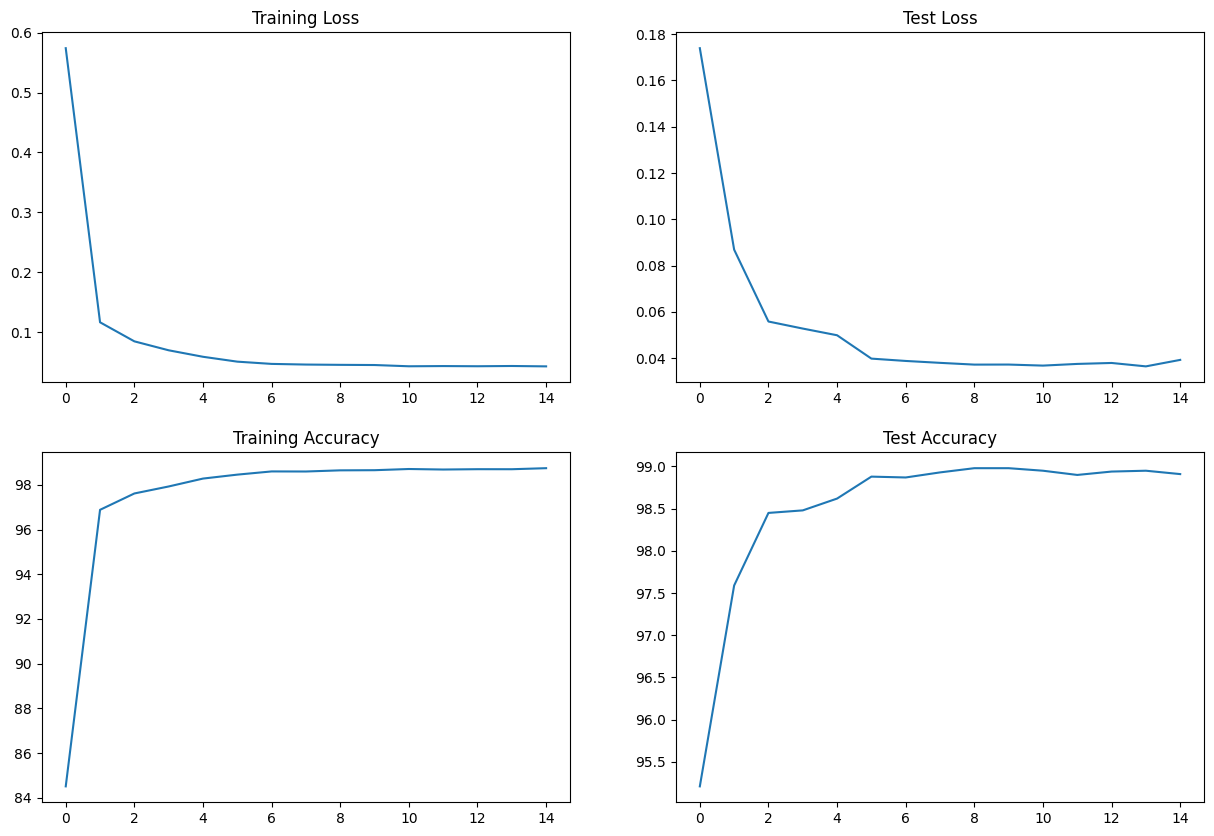

In [8]:
from model_3 import draw_graphs

draw_graphs()